# Programación Lineal

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/jhairparis/University-Jobs/blob/master/python/InvestigacionOperaciones/ProgramacionLineal.ipynb)

Formule los problemas de programación lineal para cada uno de los ejercicios propuestos, solucione usando ORtools en Python y describa su respectiva solución, si existe.

## Librerias Necesarias

In [1]:
from ortools.linear_solver import pywraplp

### Install


In [ ]:
%pip install ortools

## Primer Punto

### Proposición

Envigado, Palmira, Ibagué, las cuales pueden producir respectivamente 180, 110 y 230 carrocerías cada  una, para el año 2025 los sistemas masivos de transporte están solicitando están carrocerías de buses  BRT así: Bogotá 210, Cali 75, Bucaramanga 65 y Medellín 90, las carrocerías producidas en Envigado e  Ibagué pueden ser enviados a los almacenes de ensamble primario ubicados en Pereira y Armenia, pero  Palmira solo envía al almacén de ensamble primario ubicado en Armenia, estos almacenes de ensamble  primario, envían a su vez a cualquiera de los almacenes de terminado ubicados en Duitama y Cartago,  Ninguno de los almacenes ni de ensamble o terminado almacena carrocerías en inventario, por  consiguiente deben enviar todas las carrocerías que reciben.

Los clientes de Cali y Bucaramanga pueden recibir las carrocerías de cualquiera de los almacenes de terminado, sin embargo, por un tema de contratación los clientes de Bogotá deben obtener las carrocerías exclusivamente de Duitama y los de Medellín solo de Cartago, los costos de envío de las carrocerías a los almacenes de ensamble y de estos a los almacenes de terminado y de estos últimos a  los clientes se dan a continuación:

#### COSTOS DE ALMACENES DE ENSAMBLE TRANSPORTE

| FABRICAS | PEREIRA | ARMENIA |
| -------- | ------- | ------- |
| ENVIGADO | 500     | 1200    |
| PALMIRA  | -       | 2000    |
| IBAGUE   | 1300    | 2100    |

#### COSTOS DE TRANSPORTE ALMACENES DE TERMINADO


| ALM. ENSAMBLE | DUITAMA | CARTAGO |
| ------------- | ------- | ------- |
| PEREIRA       | 1900    | 1300    |
| ARMENIA       | 1450    | 1370    |

#### COSTOS DE TRANSPORTE CLIENTES FINALES

| ALM.TERMINADO | BOGOTA | CALI | B/MGA | MEDELLIN |
| ------------- | ------ | ---- | ----- | -------- |
| DUITAMA       | 2300   | 2100 | 1700  | -        |
| CARTAGO       | -      | 1400 | 2300  | 1800     |

![Grafico punto 1.png](<attachment:Grafico punto 1.png>)
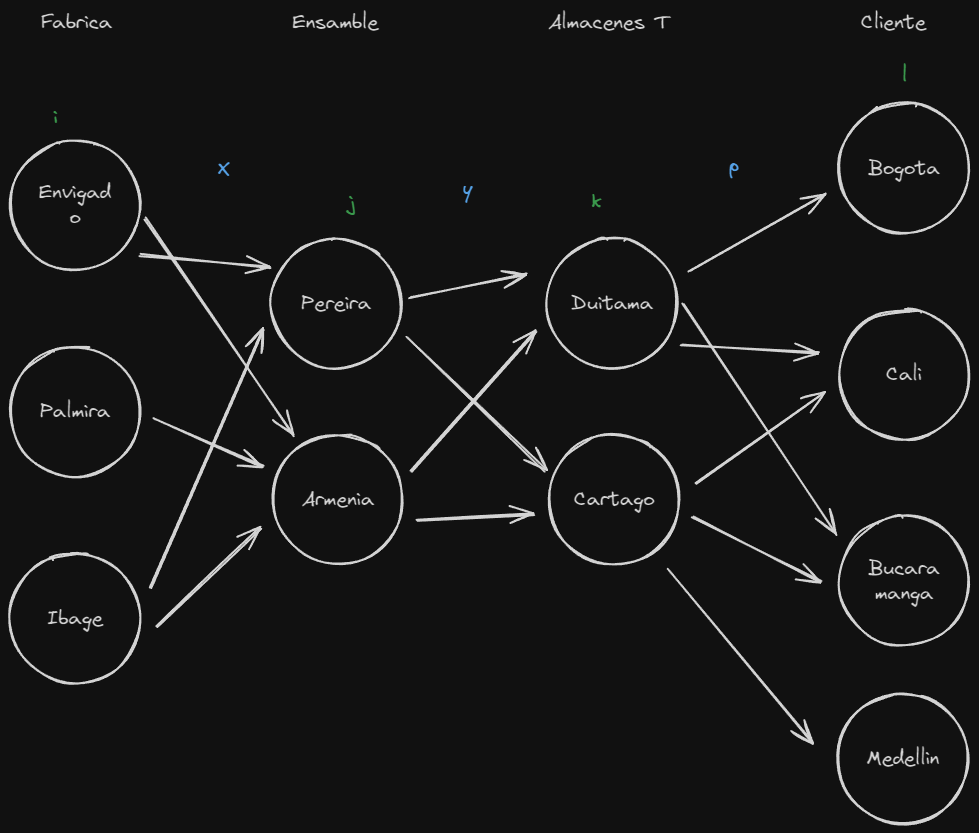


### Model 

In [24]:
solver = pywraplp.Solver.CreateSolver("GLOP")
infinity = solver.infinity()

#### Conjuntos:

- **Fábricas:** $\rightarrow i$ = {Envigado, Palmira, Ibagué}
- **Almacenes de Ensamble Primario:** $\rightarrow j$ = {Pereira, Armenia}
- **Almacenes de Terminado:** $\rightarrow k$ = {Duitama, Cartago}
- **Clientes:** $\rightarrow m$ = {Bogotá, Cali, Bucaramanga, Medellín}

#### Variables de Desición

- $x_{ij} \rightarrow$ de la fabrica $i$ al Almacén de emsamble $j$ $\forall{ij}$

- $y_{jk} \rightarrow$ del Almacén de Ensamble $j$ al Almacén de Terminado $k$ $\forall{jk}$  

- $P_{km} \rightarrow$ del Almacén de Terminado $k$ al Destino $m$ $\forall{km}$

In [25]:
xEP = solver.Var(0, infinity, integer = False, name = "Envigado - Pereira") # 500
xEA = solver.Var(0, infinity, integer = False, name = "Envigado - Armenia") # 1200
xPA = solver.Var(0, infinity, integer = False, name = "Palmira - Armenia") # 2000
xIP = solver.Var(0, infinity, integer = False, name = "Ibague - Pereira") # 1300
xIA = solver.Var(0, infinity, integer = False, name = "Ibague - Armenia") # 2100

yPD = solver.Var(0, infinity, integer = False, name = "Pereira - Duitama") # 1900
yPC = solver.Var(0, infinity, integer = False, name = "Pereira - Cartago") # 1300
yAD = solver.Var(0, infinity, integer = False, name = "Armenia - Duitama") # 1450
yAC = solver.Var(0, infinity, integer = False, name = "Armenia - Cartago") # 1370

pDBo = solver.Var(0, infinity, integer = False, name = "Duitama - Bogotá") # 2300
pDC = solver.Var(0, infinity, integer = False, name = "Duitama - Cali") # 2100
pDBu = solver.Var(0, infinity, integer = False, name = "Duitama - Bucaramanga") # 1700
pCC = solver.Var(0, infinity, integer = False, name = "Cartago - Cali") # 1400
pCBu = solver.Var(0, infinity, integer = False, name = "Cartago - Bucaramanga") # 2300
pCM = solver.Var(0, infinity, integer = False, name = "Cartago - Medallin") # 1800


print("Numero de variables =", solver.NumVariables())

Numero de variables = 15


#### Restriciones

##### Oferta

In [26]:
solver.Add(xEP + xEA <= 180)
solver.Add(xPA <= 110)
solver.Add(xIP + xIA <= 230)

<ortools.linear_solver.pywraplp.Constraint; proxy of <Swig Object of type 'operations_research::MPConstraint *' at 0x000002BC173FAF00> >

##### Demanda

In [27]:
solver.Add(pDBo >= 210)
solver.Add(pCM <= 90)
solver.Add(pDC + pCC <= 75)
solver.Add(pDBu + pCBu <= 65)

<ortools.linear_solver.pywraplp.Constraint; proxy of <Swig Object of type 'operations_research::MPConstraint *' at 0x000002BC1740EE70> >

##### Entrada == Salida

In [28]:
solver.Add(xEP + xIP - yPD - yPC == 0)
solver.Add(xEA + xPA + xIA - yAD - yAC == 0)

solver.Add(yPD + yAD - pDBo - pDC - pDBu == 0)
solver.Add(yPC + yAC - pCC - pCBu - pCM == 0)

print("Numero de restricciones", solver.NumConstraints())

Numero de restricciones 11


#### Funcion Objetivo

$Min\;z = \sum_{ij}X_{ij}*C_{ij}+\sum_{jk}Y_{jk}*C_{jk}+\sum_{km}P_{km}*C_{km}$

In [29]:

solver.Minimize(500*xEP + 1200*xEA + 2000*xPA 
				+ 1300*xIP + 2100*xIA 
				+ 1900*yPD + 1300*yPC + 1450*yAD + 1370*yAC 
				+ 2300*pDBo + 2100*pDC + 1700*pDBu + 1400*pCC + 2300*pCBu + 1800*pCM)

### Solucion

In [30]:
status = solver.Solve()

if status == pywraplp.Solver.OPTIMAL:
    print("Solución")
    print("Valor de la Función Objetivo a Maximizar es: ", solver.Objective().Value())

    print("Cnt ", xEP, ": ", xEP.solution_value())
    print("Cnt ", xEA, ": ", xEA.solution_value())
    print("Cnt ", xPA, ": ", xPA.solution_value())
    print("Cnt ", xIP, ": ", xIP.solution_value())
    print("Cnt ", xIA, ": ", xIA.solution_value())
    print("Cnt ", yPD, ": ", yPD.solution_value())
    print("Cnt ", yPC, ": ", yPC.solution_value())
    print("Cnt ", yAD, ": ", yAD.solution_value())
    print("Cnt ", yAC, ": ", yAC.solution_value())
    print("Cnt", pDBo, ": ", pDBo.solution_value())
    print("Cnt ", pDC, ": ", pDC.solution_value())
    print("Cnt", pDBu, ": ", pDBu.solution_value())
    print("Cnt ", pCC, ": ", pCC.solution_value())
    print("Cnt", pCBu, ": ", pCBu.solution_value())
    print("Cnt ", pCM, ": ", pCM.solution_value())

else:
    print("El modelo no tiene una solución optima")

Solución
Valor de la Función Objetivo a Maximizar es:  1011000.0
Cnt  Envigado - Pereira :  180.0
Cnt  Envigado - Armenia :  0.0
Cnt  Palmira - Armenia :  0.0
Cnt  Ibague - Pereira :  30.000000000000007
Cnt  Ibague - Armenia :  0.0
Cnt  Pereira - Duitama :  210.0
Cnt  Pereira - Cartago :  0.0
Cnt  Armenia - Duitama :  0.0
Cnt  Armenia - Cartago :  0.0
Cnt Duitama - Bogotá :  210.0
Cnt  Duitama - Cali :  0.0
Cnt Duitama - Bucaramanga :  0.0
Cnt  Cartago - Cali :  -0.0
Cnt Cartago - Bucaramanga :  0.0
Cnt  Cartago - Medallin :  0.0


## Segundo Punto

### Proposición

La empresa el tomatón, se dedica a la producción de productos procesados a partir del tomate, dentro 
de su capacidad de producción semanal tiene 5000 libras de tomates rojo San Marzano y 10.000 libras de 
tomates chonto, con los que hará conservas de tomate enteros y pasta de tomate. Las conservas deben 
estar compuestos de al menos un 80% de tomates rojo San Marzano, mientras que la pasta de tomate
debe elaborarse con al menos un 10% de tomates rojo San Marzano. Las conservas de tomates se venden 
a 0,8 $ la libra y la pasta se vende a 0,5 $ la libra. Formule un modelo de programación lineal que permita 
identificar cantidad de cada producto se debe hacer.

### Model 

Conjuntos:

$i = ( A,B,C,D )$

$j = (L,H )$


Parámetros:

$x_{i}:$ Tipo de producto

$x_{j}:$ Grado del lubricante

Variables de decisión

$x_{ij}:$ Cantidad de producto químico i asignada al lubricante de grado j en barriles por día 

Función Objetivo:

Max Z = (Precio de venta L - Costo Total L) * Demanda L + (Precio de venta H - Costo Total H) * Demanda H

Costo Total L = $ \sum (Costo de producto i * x_{iL}) $
Costo Total H = $ \sum (Costo de producto i * x_{iH})$

Sujeto a:

Anticorrosivo
$ \sum (Anticorrosivo i * x_{iL})$ <= 10 * Demanda L
$ \sum (Anticorrosivo i * x_{iH})$ <= 10 * Demanda H

Antioxidante
$ \sum (Antioxidante i * x_{iL}) <= 100 $* Demanda L
$ \sum (Antioxidante i * x_{iH}) <= 110 $ * Demanda H

Disponibilidad
$ \sum (x_{iL} + x_{iH})$ <= Suministro i

Demanda

$ \sum x_{iL}$ = Demanda L
$ \sum x_{iH}$ = Demanda H

$x_{ij} \forall i,j >= 0$

### Solucion

In [10]:
solver = pywraplp.Solver.CreateSolver("GLOP")

"""Declaración de variables"""
infinito = solver.infinity()
x11 = solver.Var(0,infinito,integer=False,name="Cantidad de tomate san marzano para la conserva")
x12 = solver.Var(0,infinito,integer=False,name="Cantidad de tomate san marzano para la pasta de tomate")

x21 = solver.Var(0,infinito,integer=False,name="Cantidad de tomate chonto para la conserva")
x22 = solver.Var(0,infinito,integer=False,name="Cantiddad de tomate chonto para la pasta de tomate")

print("Numero de variables =", solver.NumVariables())

Numero de variables = 4


In [11]:
"""Definir restricciones"""
solver.Add(x11+x12<=5000,"Disponibilidad tomate san marzano")
solver.Add(x21+x22<=10000,"Disponibilidad tomate chonto")

solver.Add(x11 >= 0.8*(x11+x21), "Conserva hecha con un 80% de tomate san marzano")
solver.Add(x12 >= 0.1*(x12+x22), "Pasta de tomate hecha con un 10% de tomate san marzano")

print("Numero de restricciones", solver.NumConstraints())

Numero de restricciones 4


In [12]:
"""Definir función Objetivo"""

solver.Maximize(0.8*x11+0.5*x12+0.8*x21+0.5*x22)

status=solver.Solve()

In [13]:
if status == pywraplp.Solver.OPTIMAL:
    print("Solución")
    print("Valor de la Función Objetivo a Maximizar es: ", solver.Objective().Value())
    print("Cantidad de tomate san marzano para la conserva = ", x11.solution_value())
    print("Cantidad de tomate chonto para la conserva", x12.solution_value())
    print("Cantidad de tomate san marzano para la pasta de tomate", x21.solution_value())
    print("Cantidad de tomate chonto para la pasta de tomate", x22.solution_value())
else:
    print("El modelo no tiene una solución optima")

Solución
Valor de la Función Objetivo a Maximizar es:  9000.0
Cantidad de tomate san marzano para la conserva =  4000.0
Cantidad de tomate chonto para la conserva 1000.0000000000002
Cantidad de tomate san marzano para la pasta de tomate 999.9999999999998
Cantidad de tomate chonto para la pasta de tomate 9000.000000000002


## Tercer Punto

### Proposición

La empresa francesa de trenes SNCF en su modelo de negocio para el transporte de pasajeros, considera en el trayecto París – Lyon las siguientes políticas para la venta de sus asientos, para no entrar en perdidas los asientos se deben vender como mínimo a 50 euros los de clase normal, y 75 euros los de clase Premium. Los pasajeros que compren los tiquetes con un tiempo mayor a 6 meses de anticipación pagaran el precio base más un 20% de incremento, los tiquetes con un tiempo mayor a 3 meses de anticipación pagaran el precio base más un 45% de incremento, el resto de los tiquetes vendidos se cobran teniendo en cuenta el precio base más un 80% de incremento. Los estudiantes obtienen un descuento de 10 euros en sus asientos clase normal sin importar la fecha de compra, y 8 para la clase premium solo si son comprados con un tiempo de anticipación mayor a 3 meses.

Los poseedores de la tarjeta joven, con menos de 26 años tienen un descuento de 8 euros en sus asientos clase normal sin importar la fecha de compra, y 4 para la clase premium solo si son comprados con un tiempo de anticipación mayor a 3 meses. Los adultos mayores cuentan con las mismas condiciones de los menores 26 años, solo que para ellos el descuento corresponde a la mitad del de los estudiantes.
El tren cuenta con 640 plazas disponibles, de las cuales el 35% son de clase Premium. La empresa estima que los estudiantes ocupan como mínimo la una cuarta parte del tren, las plazas Premium se venden al menos en un 40%, de estas los estudiantes adquieren como mínimo un 80% antes de 3 meses. Los adultos mayores ocupan como mínimo el 60% de la clase normal, al menos la mitad de estas son adquiridas antes del último mes

### Model 

In [2]:
solver = pywraplp.Solver.CreateSolver("GLOP")
infinity = solver.infinity()

model_data = {}

#### Conjunto(s)

- $i$ = {Normal, Premium}
- $j$ = {6MesesAntes, 3MesesAntes , normal}
- $k$ = {personas, personasViejietas, estudiantes, jovenes}

#### Variables de Desición

- $x_{ijk} \rightarrow$ Cantidad de asientos de $C_i$ comprados en el $tiempo_j$ siendo $persona_k$

In [4]:
model_data["num_variables"] = 24
model_data["Nombres variables"] = [
    "Normal-6antes-persona",
    "Normal-6antes-personaVieja",
    "Normal-6antes-estudiante",
    "Normal-6antes-joven",
    "Premium-6antes-persona",
    "Premium-6antes-personaVieja",
    "Premium-6antes-estudiante",
    "Premium-6antes-joven",
    # -
    "Normal-3antes-persona",
    "Normal-3antes-personaVieja",
    "Normal-3antes-estudiante",
    "Normal-3antes-joven",
    "Premium-3antes-persona",
    "Premium-3antes-personaVieja",
    "Premium-3antes-estudiante",
    "Premium-3antes-joven",
    # -
    "Normal-normal-persona",
    "Normal-normal-personaVieja",
    "Normal-normal-estudiante",
    "Normal-normal-joven",
    "Premium-normal-persona",
    "Premium-normal-personaVieja",
    "Premium-normal-estudiante",
    "Premium-normal-joven",
]

In [5]:
infinito = solver.infinity()
x = {}

for j in range(model_data["num_variables"]):
    x[j] = solver.Var(
        0, infinito, integer=False, name=model_data["Nombres variables"][j]
    )

print("numero de variables =", solver.NumVariables())

numero de variables = 24


#### Restriciones

**Numero de plazas disponibles**
$\sum_{i} \sum_{j} \sum_{k} X_{ijk} \leq 640$

**35% son premium**
$\sum_{j} \sum_{k} X_{2,j,k} \leq 640*0.35=224$

**Ocupacion 1/4 de estudiantes**
$\sum_{i} \sum_{j} X_{i,j,3} \leq \frac{1}{4}640=160$

**se venden un 40%  de premium**
$\sum_{j} \sum_{k} X_{2,j,k} \geq 224*40\%=112$

**Estudiantes adquieren 80% antes  de los 3 meses de los premium**
$\sum_{j} X_{2,j,3} \geq 112*80\% =89.6$

**Los adultos mayores ocupan como mínimo el 60% de la clase normal**
$\sum_{k} X_{1,k,2} \geq ((640*65\%)*60\%)=249.6$

**al menos la mitad de estas son adquiridas antes del último mes**
$X_{1,3,2} \geq 249.6*50\%=124.8$


In [6]:
model_data["num_restricciones"] = 7
model_data["Nombres restricciones"] = [
    "Numero de plazas disponibles",
    "0.35 son premium",
    "Ocupacion 1/4 de estudiantes",
    "Se venden un 0.4 de premium",
    "Estudiantes adquieren 0.8 antes  de los 3 meses de los premium",
    "Los adultos mayores ocupan como mínimo el 0.6 de la clase normal",
    "Al menos la mitad de estas son adquiridas antes del último mes",
]

model_data["coeficientes_restricciones"] = [
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1],
    [0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0],
    [0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1],
    [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0],
    [0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
]

model_data["valores_lado_derecho"] = [640, 224, 160, 112, 89.6, 249.6, 124.8]

In [7]:
for i in range(model_data["num_restricciones"]):
    restricciones = solver.RowConstraint(0, model_data["valores_lado_derecho"][i], model_data["Nombres restricciones"][i])

    for j in range(model_data["num_variables"]):
        restricciones.SetCoefficient(x[j],model_data["coeficientes_restricciones"][i][j])

print("Numero de restricciones =", solver.NumConstraints())

Numero de restricciones = 7


#### Funcion Objetivo

In [8]:
model_data["coeficientes_funcionOb"] = [
    60,
    56,
    50,
    52,
    90,
    88,
    82,
    86,
    # -
    72.5,
    68.5,
    62.5,
    64.5,
    108.75,
    106.75,
    100.75,
    104.75,
    # -
    90,
    86,
    80,
    82,
    135,
    135,
    135,
    135,
]

In [9]:
funcion_Objetivo = solver.Objective()

for j in range(model_data["num_variables"]):
    funcion_Objetivo.SetCoefficient(x[j], model_data["coeficientes_funcionOb"][j])

<h3 style="color:red">Verficar Max/Min</h3>

In [10]:
funcion_Objetivo.SetMaximization()

### Solucion

In [11]:
modelo=solver.Solve()

if modelo == pywraplp.Solver.OPTIMAL:
    print("Solución")
    print("Valor de la Función Objetivo a Maximizar: ", solver.Objective().Value())

    for j in range(model_data["num_variables"]):
        print(x[j].name(), " = ",x[j].solution_value())
else:
    print("El modelo no tiene una solución optima")

Solución
Valor de la Función Objetivo a Maximizar:  62640.0
Normal-6antes-persona  =  0.0
Normal-6antes-personaVieja  =  0.0
Normal-6antes-estudiante  =  0.0
Normal-6antes-joven  =  0.0
Premium-6antes-persona  =  0.0
Premium-6antes-personaVieja  =  0.0
Premium-6antes-estudiante  =  0.0
Premium-6antes-joven  =  0.0
Normal-3antes-persona  =  0.0
Normal-3antes-personaVieja  =  0.0
Normal-3antes-estudiante  =  0.0
Normal-3antes-joven  =  0.0
Premium-3antes-persona  =  0.0
Premium-3antes-personaVieja  =  0.0
Premium-3antes-estudiante  =  0.0
Premium-3antes-joven  =  0.0
Normal-normal-persona  =  528.0
Normal-normal-personaVieja  =  0.0
Normal-normal-estudiante  =  0.0
Normal-normal-joven  =  0.0
Premium-normal-persona  =  112.0
Premium-normal-personaVieja  =  0.0
Premium-normal-estudiante  =  0.0
Premium-normal-joven  =  0.0


## Cuarto Punto

### Proposición

La empresa Bavaria plantea su plan de producción para el año 2023, el cual le permita satisfacer la demanda de consumidores durante todo el año. La producción de cada litro de cerveza tiene un costo de 2 USD, este costo se mantiene durante el primer trimestre del año. Posterior a ello el costo incrementa a 3 USD durante el siguiente trimestre, y después de ello incrementa en un 75% para los meses siguientes. La empresa maneja unas demandas promedio de 120 mil, 120 mil, 140 mil litros de cerveza mensuales durante el primer trimestre, pero posterior a ello se incrementa la demanda 15 mil litros en relación con el mes que corresponde al trimestre anterior. En el último trimestre la demanda se duplica en relación con respecto al primer trimestre. La planta trabaja durante dos turnos al día, en el primer turno se operan 5 tanques de producción y en la tarde 4, cada tanque cuenta con capacidad de producción de 30 mil litros semanales de cerveza. El gerente indica que la operación durante el turno de la tarde incurre en costos adicionales de 25% por litro producido. En una situación de desabastecimiento la puede almacenar hasta 200 mil litros con un costo de 1,5 por litro almacenado. Definir el plan de producción que garantice satisfacer la demanda

### Modelo

In [2]:
solver = pywraplp.Solver.CreateSolver("GLOP")
infinity = solver.infinity()

model_data = {}

#### Conjuntos

- $i$ = {Mes1, Mes2, Mes3, Mes4, Mes5, Mes6, Mes7, Mes8, Mes9, Mes10, Mes11, Mes12}
- $j$ = {Manana, Tarde}
- $k$ = {Mes1, Mes2, Mes3, Mes4, Mes5, Mes6, Mes7, Mes8, Mes9, Mes10, Mes11}


#### Variables

- $X_{ij} \rightarrow$ Cantidad de litros de Cerveza en el $M_i$ en $J_j$
- $Y_{ij} \rightarrow$ Cantidad de litros de Cerveza en el $M_k$ en $J_j$ vendidos en $V_{k+1}$ 

In [3]:
model_data["num_variables"] = 46
model_data["Nombres variables"] = [
    "xMes1-Manana",
    "xMes2-Manana",
    "xMes3-Manana",
    "xMes4-Manana",
    "xMes5-Manana",
    "xMes6-Manana",
    "xMes7-Manana",
    "xMes8-Manana",
    "xMes9-Manana",
    "xMes10-Manana",
    "xMes11-Manana",
    "xMes12-Manana",
    "xMes1-Tarde",
    "xMes2-Tarde",
    "xMes3-Tarde",
    "xMes4-Tarde",
    "xMes5-Tarde",
    "xMes6-Tarde",
    "xMes7-Tarde",
    "xMes8-Tarde",
    "xMes9-Tarde",
    "xMes10-Tarde",
    "xMes11-Tarde",
    "xMes12-Tarde",
    # -
    "yMes1-Manana",
    "yMes2-Manana",
    "yMes3-Manana",
    "yMes4-Manana",
    "yMes5-Manana",
    "yMes6-Manana",
    "yMes7-Manana",
    "yMes8-Manana",
    "yMes9-Manana",
    "yMes10-Manana",
    "yMes11-Manana",
    "yMes1-Tarde",
    "yMes2-Tarde",
    "yMes3-Tarde",
    "yMes4-Tarde",
    "yMes5-Tarde",
    "yMes6-Tarde",
    "yMes7-Tarde",
    "yMes8-Tarde",
    "yMes9-Tarde",
    "yMes10-Tarde",
    "yMes11-Tarde",
]

In [4]:
infinito = solver.infinity()
x = {}

for j in range(model_data["num_variables"]):
    x[j] = solver.Var(
        0, infinito, integer=False, name=model_data["Nombres variables"][j]
    )

print("numero de variables =", solver.NumVariables())

numero de variables = 46


#### Restriciones

In [5]:
model_data["num_restricciones"] = 15
model_data["Nombres restricciones"] = [
	"Capacidad tanque manana",
	"Capacidad tanque tarde",
    "Mes1",
    "Mes2",
    "Mes3",
    "Mes4",
    "Mes5",
    "Mes6",
    "Mes7",
    "Mes8",
    "Mes9",
    "Mes10",
    "Mes11",
    "Mes12",
    "Desbastecimiento",
	]

model_data["coeficientes_restricciones"] = [
 [1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0],
 [0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1],
 [1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
 [0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0],
 [0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0],
 [0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0],
 [0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0],
 [0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0],
 [0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0],
 [0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0],
 [0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0],
 [0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0],
 [0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0],
 [0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1],
 [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
]

model_data["valores_lado_derecho"] = [
	600000,
    480000,
    120000,
    120000,
	140000,
	135000,
	135000,
	155000,
    150000,
	150000,
	170000,
	270000,
	270000,
	280000,
	200000,
]

In [6]:
for i in range(model_data["num_restricciones"]):
    restricciones = solver.RowConstraint(0, model_data["valores_lado_derecho"][i], model_data["Nombres restricciones"][i])

    for j in range(model_data["num_variables"]):
        restricciones.SetCoefficient(x[j],model_data["coeficientes_restricciones"][i][j])

print("Numero de restricciones =", solver.NumConstraints())

Numero de restricciones = 15


#### Funcion Objetivo

In [7]:
model_data["coeficientes_funcionOb"] = [
    2,
    2,
    2,
    3,
    3,
    3,
    5.25,
    5.25,
    5.25,
    5.25,
    5.25,
    5.25,
    2.5,
    2.5,
    2.5,
    3.75,
    3.75,
    3.57,
    6.56,
    6.56,
    6.56,
    6.56,
    6.56,
    6.56,
    # -
    3.5,
    3.5,
    3.5,
    4.5,
    4.5,
    4.5,
    6.75,
    6.75,
    6.75,
    6.75,
    6.75,
    4,
    4,
    4,
    5.25,
    5.25,
    5.25,
    8.06,
    8.06,
    8.06,
    8.06,
    8.06,
]

In [8]:
funcion_Objetivo = solver.Objective()

for j in range(model_data["num_variables"]):
    funcion_Objetivo.SetCoefficient(x[j], model_data["coeficientes_funcionOb"][j])

<h3 style="color:red">Verficar Max/Min</h3>

In [11]:
funcion_Objetivo.SetMinimization()

### Solucion

In [13]:
modelo=solver.Solve()

if modelo == pywraplp.Solver.OPTIMAL:
    print("Solución")
    print("Valor de la Función Objetivo a Maximizar: ", solver.Objective().Value())

    for j in range(model_data["num_variables"]):
        print(x[j].name(), " = ",x[j].solution_value())
else:
    print("El modelo no tiene una solución optima")

Solución
Valor de la Función Objetivo a Maximizar:  6598800.0
xMes1-Manana  =  0.0
xMes2-Manana  =  0.0
xMes3-Manana  =  0.0
xMes4-Manana  =  0.0
xMes5-Manana  =  0.0
xMes6-Manana  =  0.0
xMes7-Manana  =  0.0
xMes8-Manana  =  150000.0
xMes9-Manana  =  0.0
xMes10-Manana  =  270000.0
xMes11-Manana  =  140000.0
xMes12-Manana  =  39999.99999999996
xMes1-Tarde  =  0.0
xMes2-Tarde  =  0.0
xMes3-Tarde  =  0.0
xMes4-Tarde  =  0.0
xMes5-Tarde  =  0.0
xMes6-Tarde  =  0.0
xMes7-Tarde  =  150000.0
xMes8-Tarde  =  0.0
xMes9-Tarde  =  0.0
xMes10-Tarde  =  0.0
xMes11-Tarde  =  129999.99999999999
xMes12-Tarde  =  0.0
yMes1-Manana  =  0.0
yMes2-Manana  =  0.0
yMes3-Manana  =  0.0
yMes4-Manana  =  0.0
yMes5-Manana  =  0.0
yMes6-Manana  =  0.0
yMes7-Manana  =  0.0
yMes8-Manana  =  0.0
yMes9-Manana  =  0.0
yMes10-Manana  =  0.0
yMes11-Manana  =  0.0
yMes1-Tarde  =  0.0
yMes2-Tarde  =  0.0
yMes3-Tarde  =  0.0
yMes4-Tarde  =  0.0
yMes5-Tarde  =  0.0
yMes6-Tarde  =  0.0
yMes7-Tarde  =  0.0
yMes8-Tarde  =  0.

## Quinto punto

### Proposición

Harinera del valle tiene 5 centros productivos en la región del valle del cauca, el primero ubicado en Palmira produce 150000 bultos de Harina al día, el segundo centro se encuentra en Buga y generan 160000 bultos de Harina diarios, Tuluá produce 180000 bultos de Harina al día, Yumbo 250000 bultos de Harina al día y Cartago produce 180000 bultos de Harina al día. Los centros productivos atienden la demanda de las 6 principales ciudades del país, con demandas mensuales de 5 millones de bultos de harina para Bogotá, 6 millones para Medellín, 5.3 millones para Cali, 3.5 millones para Barranquilla, 4 millones para Cartagena de Indias y Manizales con 3.5 millones. La tabla que relaciona los costos se describe a continuación:

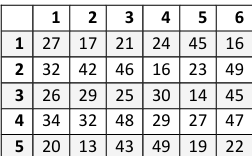

### Model

In [2]:
solver = pywraplp.Solver.CreateSolver("GLOP")
infinity = solver.infinity()

#### Conjuntos:

- **Centros de produccion:** $\rightarrow i$ = {Palmira, Buga, Tuluá, Yumbo, Cartago}
- **Ciidades:** $\rightarrow j$ = {Bogotá, Medellín, Cali, Barranquilla, Cartagena, Manizales}

#### Variables de Desición

- $x_{ij} \rightarrow$ cantidad de bultos de harina que se transportan desde el centro de producción $i$ hasta la ciudad $j$ $\forall{ij}$
- $c_{ij} \rightarrow$ costo de transporte de bulto de harina desde el centro de producción $i$ hasta la ciudad $j$ $\forall{ij}$

In [3]:
x11 = solver.Var(0,infinity,integer=False,name="Palmira-Bogota")
x12 = solver.Var(0,infinity,integer=False,name="Palmira-Medellin")
x13 = solver.Var(0,infinity,integer=False,name="Palmira-cali")
x14 = solver.Var(0,infinity,integer=False,name="Palmira-Barranquilla")
x15 = solver.Var(0,infinity,integer=False,name="Palmira-Cartagena")
x16 = solver.Var(0,infinity,integer=False,name="Palmira-Manizales")

x21 = solver.Var(0,infinity,integer=False,name="Buga-Bogota")
x22 = solver.Var(0,infinity,integer=False,name="Buga-Medellin")
x23 = solver.Var(0,infinity,integer=False,name="Buga-cali")
x24 = solver.Var(0,infinity,integer=False,name="Buga-Barranquilla")
x25 = solver.Var(0,infinity,integer=False,name="Buga-Cartagena")
x26 = solver.Var(0,infinity,integer=False,name="Buga-Manizales")

x31 = solver.Var(0,infinity,integer=False,name="Tuluá-Bogota")
x32 = solver.Var(0,infinity,integer=False,name="Tuluá-Medellin")
x33 = solver.Var(0,infinity,integer=False,name="Tuluá-cali")
x34 = solver.Var(0,infinity,integer=False,name="Tuluá-Barranquilla")
x35 = solver.Var(0,infinity,integer=False,name="Tuluá-Cartagena")
x36 = solver.Var(0,infinity,integer=False,name="Tuluá-Manizales")

x41 = solver.Var(0,infinity,integer=False,name="Yumbo-Bogota")
x42 = solver.Var(0,infinity,integer=False,name="Yumbo-Medellin")
x43 = solver.Var(0,infinity,integer=False,name="Yumbo-cali")
x44 = solver.Var(0,infinity,integer=False,name="Yumbo-Barranquilla")
x45 = solver.Var(0,infinity,integer=False,name="Yumbo-Cartagena")
x46 = solver.Var(0,infinity,integer=False,name="Yumbo-Manizales")

x51 = solver.Var(0,infinity,integer=False,name="Cartago-Bogota")
x52 = solver.Var(0,infinity,integer=False,name="Cartago-Medellin")
x53 = solver.Var(0,infinity,integer=False,name="Cartago-cali")
x54 = solver.Var(0,infinity,integer=False,name="Cartago-Barranquilla")
x55 = solver.Var(0,infinity,integer=False,name="Cartago-Cartagena")
x56 = solver.Var(0,infinity,integer=False,name="Cartago-Manizales")



print("Numero de variables =", solver.NumVariables())

Numero de variables = 30


#### Restriciones

##### Capacidad de Produccion
- **Palmira:** $\rightarrow $ $x_{11}+x_{12}+x_{13}+x_{14}+x_{15}+x_{16}\leq 150000 * 30$

- **Buga:** $\rightarrow $ $x_{21}+x_{22}+x_{23}+x_{24}+x_{25}+x_{26}\leq 160000 * 30$

- **Tualuá:** $\rightarrow $ $ $x_{31}+x_{32}+x_{33}+x_{34}+x_{35}+x_{36}\leq 180000 * 30$

- **Yumbo:** $\rightarrow $ $x_{41}+x_{42}+x_{43}+x_{44}+x_{45}+x_{46}\leq 250000 * 30$

- **Cartago:** $\rightarrow $ $x_{51}+x_{52}+x_{53}+x_{54}+x_{55}+x_{56}\leq 180000 * 30$




In [4]:
solver.Add(x11+x12+x13+x14+x15+x16<=150000*30) #Palmira
solver.Add(x21+x22+x23+x24+x25+x26<=160000*30) #Buga
solver.Add(x31+x32+x33+x34+x35+x36<=180000*30) #Tuluá
solver.Add(x41+x42+x43+x44+x45+x46<=250000*30) #Yumbo
solver.Add(x51+x52+x53+x54+x55+x56<=180000*30) #Cartago

<ortools.linear_solver.pywraplp.Constraint; proxy of <Swig Object of type 'operations_research::MPConstraint *' at 0x000002B32461A630> >

##### Demanda de cuidades

- **Bogotá:** $\rightarrow $ $x_{11}+x_{21}+x_{31}+x_{41}+x_{51}\geq 5000000$

- **Medllín:** $\rightarrow $ $x_{12}+x_{22}+x_{32}+x_{42}+x_{52}\geq 6000000$

- **Cali:** $\rightarrow $ $x_{13}+x_{23}+x_{33}+x_{43}+x_{53} \geq 5300000$

- **Barranquilla:** $\rightarrow $ $x_{14}+x_{24}+x_{34}+x_{44}+x_{54} \geq 350000$
- **Cartagena:** $\rightarrow $ $x_{15}+x_{25}+x_{35}+x_{45}+x_{55} \geq 4000000$

- **Manizales:** $\rightarrow $ $x_{16}+x_{26}+x_{36}+x_{46}+x_{56} \geq 3500000$



In [5]:
solver.Add(x11+x21+x31+x41+x51>=5000000) #Bogota
solver.Add(x12+x22+x32+x42+x52>=6000000) #Medellin
solver.Add(x13+x23+x33+x43+x53>=5300000) #Cali
solver.Add(x14+x24+x34+x44+x54>=3500000) #Barranquilla
solver.Add(x15+x25+x35+x45+x55>=4000000) #Cartagena
solver.Add(x16+x26+x36+x46+x56>=3500000) #Manizales

print("Numero de restricciones", solver.NumConstraints())

Numero de restricciones 11


##### No negatividad
$x_{ij} \geq 0  ∀ i, j$

#### Funcion Objetivo

$Min\;z = 27x_{11}+17x_{12}+21x_{13}+24x_{14}+45x_{15}+16x_{16}+32x_{21}+42x_{22}+46x_{23}+16x_{24}+23x_{25}+49x_{26}+26x_{31}+29x_{32}+25x_{33}+30x_{34}+14x_{35}+45x_{36}+34x_{41}+32x_{42}+48x_{43}+29x_{44}+27x_{45}+47x_{46}+20x_{51}+13x_{52}+43x_{53}+49x_{54}+19x_{55}+22x_{56} $

In [6]:
solver.Minimize(27*x11+17*x12+21*x13+24*x14+45*x15+16*x16+
                32*x21+42*x22+46*x23+16*x24+23*x25+49*x26+
                26*x31+29*x32+25*x33+30*x34+14*x35+45*x36+
                34*x41+32*x42+48*x43+29*x44+27*x45+47*x46+
                20*x51+13*x52+43*x53+49*x54+19*x55+22*x56)

status=solver.Solve()

#### Solucion

In [7]:
if status == pywraplp.Solver.OPTIMAL:
    print("Solución")
    print("Valor de la Función Objetivo a Maximizar: ", solver.Objective().Value())
    print("Palmira-Bogota ", x11.solution_value())
    print("Palmira-Medellin ", x12.solution_value())
    print("Palmira-cali ", x13.solution_value())
    print("Palmira-Barranquilla ", x14.solution_value())
    print("Palmira-Cartagena", x15.solution_value())
    print("Palmira-Manizales", x16.solution_value())
    print("   ")
    print("Buga-Bogota ", x21.solution_value())
    print("Buga-Medellin ", x22.solution_value())
    print("Buga-cali ", x23.solution_value())
    print("Buga-Barranquilla ", x24.solution_value())
    print("Buga-Cartagena", x25.solution_value())
    print("Buga-Manizales", x26.solution_value())
    print("   ")
    print("Tuluá-Bogota ", x31.solution_value())
    print("Tuluá-Medellin ", x32.solution_value())
    print("Tuluá-cali ", x33.solution_value())
    print("Tuluá-Barranquilla ", x34.solution_value())
    print("Tuluá-Cartagena", x35.solution_value())
    print("Tuluá-Manizales", x36.solution_value())
    print("   ")
    print("Yumbo-Bogota ", x41.solution_value())
    print("Yumbo-Medellin ", x42.solution_value())
    print("Yumbo-cali ", x43.solution_value())
    print("Yumbo-Barranquilla ", x44.solution_value())
    print("Yumbo-Cartagena", x45.solution_value())
    print("Yumbo-Manizales", x46.solution_value())
    print("   ")
    print("Cartago-Bogota ", x51.solution_value())
    print("Cartago-Medellin ", x52.solution_value())
    print("Cartago-cali ", x53.solution_value())
    print("Cartago-Barranquilla ", x54.solution_value())
    print("Cartago-Cartagena", x55.solution_value())
    print("Cartago-Manizales", x56.solution_value())

else:
    print("El modelo no tiene una solución optima")

Solución
Valor de la Función Objetivo a Maximizar:  588399999.9999999
Palmira-Bogota  0.0
Palmira-Medellin  0.0
Palmira-cali  1000000.0000000003
Palmira-Barranquilla  0.0
Palmira-Cartagena 0.0
Palmira-Manizales 3500000.0
   
Buga-Bogota  0.0
Buga-Medellin  0.0
Buga-cali  0.0
Buga-Barranquilla  3500000.0
Buga-Cartagena 1300000.0
Buga-Manizales 0.0
   
Tuluá-Bogota  0.0
Tuluá-Medellin  0.0
Tuluá-cali  4299999.999999999
Tuluá-Barranquilla  0.0
Tuluá-Cartagena 1100000.0000000007
Tuluá-Manizales 0.0
   
Yumbo-Bogota  5000000.0
Yumbo-Medellin  599999.9999999994
Yumbo-cali  0.0
Yumbo-Barranquilla  0.0
Yumbo-Cartagena 1599999.999999999
Yumbo-Manizales 0.0
   
Cartago-Bogota  0.0
Cartago-Medellin  5400000.0
Cartago-cali  0.0
Cartago-Barranquilla  0.0
Cartago-Cartagena 0.0
Cartago-Manizales 0.0


- **a**. ¿Cuál es el costo de aprovisionar la ciudad de Bogotá?
- **b**. ¿Cuál es el costo de aprovisionar la ciudad de Medellín?
- **c**. ¿El ejercicio está balanceado? ¿Cuál es el punto de destino o de origen que se ve afectado en el caso de que el ejercicio este desbalanceado?
- **d**. ¿Cuánto invierte en costos de distribución la planta de Tuluá?
- **e**. ¿Cuánto invierte en costos de distribución la planta de Yumbo?

In [8]:
print("a) El costo de aprovisionar a la cuidad de bogota es: ",27*(x11.solution_value())+32*(x21.solution_value())+26*(x31.solution_value())+34*(x41.solution_value())+20*(x51.solution_value()))
print("b) El costo de aprovisionar a la cuidad de Medellin es: ",17*(x12.solution_value())+42*(x22.solution_value())+29*(x32.solution_value())+32*(x42.solution_value())+13*(x52.solution_value()))
print("c) El ejercicio esta desbalanceado ya que la Ofertar >= Demanda el punto de origigen que se ve afectado es Yumbo ya que al terminar el mes le sobrarian 300 mil bultos de harina ")
print("d) La cantidad que invierte la distribuidora de la planta de Tulúa es:",26*(x31.solution_value())+29*(x32.solution_value())+25*(x33.solution_value())+30*(x34.solution_value())+14*(x35.solution_value())+45*(x36.solution_value()))
print("e) La cantidad que invierte la distribuidora de la planta de Yumbo es:",34*(x41.solution_value())+32*(x42.solution_value())+48*(x43.solution_value())+29*(x44.solution_value())+27*(x45.solution_value())+47*(x46.solution_value()))


a) El costo de aprovisionar a la cuidad de bogota es:  170000000.0
b) El costo de aprovisionar a la cuidad de Medellin es:  89399999.99999999
c) El ejercicio esta desbalanceado ya que la Ofertar >= Demanda el punto de origigen que se ve afectado es Yumbo ya que al terminar el mes le sobrarian 300 mil bultos de harina 
d) La cantidad que invierte la distribuidora de la planta de Tulúa es: 122899999.99999999
e) La cantidad que invierte la distribuidora de la planta de Yumbo es: 232399999.99999994


## Sexto Punto

### Proposición

La empresa francesa de trenes SNCF en una de sus unidades de negocio se dedica al transporte de pasajeros, para que cada uno de sus trenes inicie los recorridos se debe tener completa la tripulación del tren con el fin de garantizar la normativa francesa. Para asignar trabajadores al tren la empresa contrata los servicios de 4 empresas, la empresa “los alegres” cuenta con 2500 empleados, la empresa “los estudiosos” cuenta con 1800 empleados, la empresa “los creativos” cuenta con 3500 empleados, y la empresa “trabajo en equipo” cuenta con 1800 empleados. Cada una de las empresas negocia una tarifa particular para cada ciudad de destino desde la cual saldrán los trenes. Los trenes requieren de 50 personas para salir de la estación del tren, y cada ciudad despacha una cantidad diferentes de trenes, París despacha 50 trenes diarios, Lyon 42 trenes diarios, Niza opera con 20 trenes diarios, Lille despacha 25 trenes y Toulouse utiliza 30 trenes. La matriz de costos por empleado se muestra a continuación:

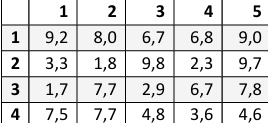


### Model

In [2]:
solver = pywraplp.Solver.CreateSolver("GLOP")
infinity = solver.infinity()

#### Conjuntos:
- **Empresas:** $\rightarrow i$ = {Los alegres, Los estudiosos, Los creativos, Trabajo en equipo}
- **Empleados:** $\rightarrow d$ ={2500, 1800, 3500, 1800}
- **Cuidades:** $\rightarrow j$ = {Paris, Lyon, Nize, Lille, Toulouse}
- **Trenes:** $\rightarrow t$ = {50, 42, 20, 25, 30}



#### Variables de Decisión

- $x_{ij} \rightarrow$ número de trabajadores de la empresa  $i$  asignados a la ciudad  $j$ $\forall{ij}$
- $C_{ij} \rightarrow$ costo por trabajador de la empresa    $i$  en la ciudad  $j$ $\forall{ij}$
- $d_{i} \rightarrow$ Cnt de Emp en la empresa    $i$ $\forall{i}$
- $t_{j} \rightarrow$ Cnt de trenes diarios para la cuidad  $j$   $\forall{j}$

In [3]:
x11 = solver.Var(0,infinity,integer=False,name="Alegres-Paris")
x12 = solver.Var(0,infinity,integer=False,name="Alegres-Lyon")
x13 = solver.Var(0,infinity,integer=False,name="Alegres-Niza")
x14 = solver.Var(0,infinity,integer=False,name="Alegres-Lille")
x15 = solver.Var(0,infinity,integer=False,name="Alegres-Toulouse")


x21 = solver.Var(0,infinity,integer=False,name="Estudiosos-Paris")
x22 = solver.Var(0,infinity,integer=False,name="Estudiosos-Lyon")
x23 = solver.Var(0,infinity,integer=False,name="Estudiosos-Niza")
x24 = solver.Var(0,infinity,integer=False,name="Estudiosos-Lille")
x25 = solver.Var(0,infinity,integer=False,name="Estudiosos-Toulouse")


x31 = solver.Var(0,infinity,integer=False,name="Creativos-Paris")
x32 = solver.Var(0,infinity,integer=False,name="Creativos-Lyon")
x33 = solver.Var(0,infinity,integer=False,name="Creativos-Niza")
x34 = solver.Var(0,infinity,integer=False,name="Creativos-Lille")
x35 = solver.Var(0,infinity,integer=False,name="Creativos-Toulouse")


x41 = solver.Var(0,infinity,integer=False,name="Trabajo en equipo -Paris")
x42 = solver.Var(0,infinity,integer=False,name="Trabajo en equipo-Lyon")
x43 = solver.Var(0,infinity,integer=False,name="Trabajo en equipo-Niza")
x44 = solver.Var(0,infinity,integer=False,name="Trabajo en equipo-Lille")
x45 = solver.Var(0,infinity,integer=False,name="Trabajo en equipo-Toulouse")

print("Numero de variables =", solver.NumVariables())

Numero de variables = 20


#### Restricciones

##### Disponibilidad de Empleados:

$$\sum_{j} x_{ij} \leq d_i \quad \forall i$$

In [4]:
solver.Add(x11+x12+x13+x14+x15<=2500) #Emp 1
solver.Add(x21+x22+x23+x24+x25<=1800) #Emp 2
solver.Add(x31+x32+x33+x34+x35<=3500) #Emp 3
solver.Add(x41+x42+x43+x44+x45<=1800) #Emp 4

<ortools.linear_solver.pywraplp.Constraint; proxy of <Swig Object of type 'operations_research::MPConstraint *' at 0x000002ADF6A18270> >

##### Demada de trenes:

$$\sum_{i} x_{ij} \geq t_j * 50\quad \forall j$$

In [5]:
solver.Add(x11+x21+x31+x41>=50*50) #Paris
solver.Add(x12+x22+x32+x42>=42*50) #Lyon
solver.Add(x13+x23+x33+x43>=20*50) #niza
solver.Add(x14+x24+x34+x44>=25*50) #Lille
solver.Add(x15+x25+x35+x45>=30*50) #Toulouse

print("Numero de restricciones", solver.NumConstraints())

Numero de restricciones 9


##### No negatividad
$x_{ij} \geq 0  ∀ i, j$

#### Funcion Objetivo
$Minz=\sum_{i} \sum_{j} c_{ij} x_{ij}$

In [6]:
solver.Minimize(9.5*x11+8*x12+6.7*x13+6.8*x14+9*x15+
                3.3*x21+1.8*x22+9.8*x23+2.6*x24+9.7*x25+
                1.7*x31+7.7*x32+2.9*x33+6.7*x34+7.8*x35+
                7.5*x41+7.7*x42+4.8*x43+3.6*x44+4.6*x45)

status=solver.Solve()


#### Solucion

In [7]:
if status == pywraplp.Solver.OPTIMAL:
    print("Solución")
    print("Valor de la Función Objetivo a Maximizar: ", solver.Objective().Value())
    print("Alegres-Paris ", x11.solution_value())
    print("Alegres-Lyon ", x12.solution_value())
    print("Alegres-Niza ", x13.solution_value())
    print("Alegres-Lille ", x14.solution_value())
    print("Alegres-Toulouse", x15.solution_value())
    print("   ")
    print("Estudiosos-Paris ", x21.solution_value())
    print("Estudiosos-Lyon ", x22.solution_value())
    print("Estudiosos-Niza ", x23.solution_value())
    print("Estudiosos-Lille ", x24.solution_value())
    print("Estudiosos-Toulouse", x25.solution_value())

    print("   ")
    print("Creativos-Paris ", x31.solution_value())
    print("Creativos-Lyon ", x32.solution_value())
    print("Creativos-Niza ", x33.solution_value())
    print("Creativos-Lille ", x34.solution_value())
    print("Creativos-Toulouse", x35.solution_value())

    print("   ")
    print("Trabajo en equipo-Paris ", x41.solution_value())
    print("Trabajo en equipo-Lyon ", x42.solution_value())
    print("Trabajo en equipo-Niza ", x43.solution_value())
    print("Trabajo en equipo-Lille ", x44.solution_value())
    print("Trabajo en equipo-Toulouse", x45.solution_value())



else:
    print("El modelo no tiene una solución optima")

Solución
Valor de la Función Objetivo a Maximizar:  27230.0
Alegres-Paris  0.0
Alegres-Lyon  300.00000000000006
Alegres-Niza  0.0
Alegres-Lille  950.0
Alegres-Toulouse 0.0
   
Estudiosos-Paris  0.0
Estudiosos-Lyon  1800.0
Estudiosos-Niza  0.0
Estudiosos-Lille  0.0
Estudiosos-Toulouse 0.0
   
Creativos-Paris  2500.0
Creativos-Lyon  0.0
Creativos-Niza  1000.0
Creativos-Lille  0.0
Creativos-Toulouse 0.0
   
Trabajo en equipo-Paris  0.0
Trabajo en equipo-Lyon  0.0
Trabajo en equipo-Niza  0.0
Trabajo en equipo-Lille  300.00000000000006
Trabajo en equipo-Toulouse 1500.0


- **a**. ¿Cuál es el costo de operar en París?
- **b**. ¿Cuál es el costo de operar en Niza?
- **c**. ¿Qué ciudad se ve afectada por la falta de trabajadores?
- **d**. ¿Cuántos trenes no son posibles de poner en operación? 
- **e**. ¿Cuánto le adeuda la SNCF a la empresa “los creativos”? 
- **f**. ¿Cuánto le adeuda la SNCF a la empresa “los alegres”? 

In [8]:

print("A) El Costo de operar en París es: ", 9.2*(x11.SolutionValue())+3.3*(x21.solution_value())+1.7*(x31.solution_value())+7.5*(x41.solution_value()))
print("B) El Costo de operar en Niza es: ", 6.7*(x13.SolutionValue())+9.8*(x23.solution_value())+2.9*(x33.solution_value())+4.8*(x43.solution_value()))
print("C) La cuidad que se ve afectada por la falta de trabajadores es : Ninguna cuidad se ve afectada")
print("D) La cantidad de trenes que no se pudo poner en operacion es: \nse cumplio con la cantidad de trenes dirios para cada cuidad no obstante para la empresa los alegres sobraron 1250 empleados por lo tanto pudo haber enviado 25 trenes mas")
print("E) la adeuda para la empresa los Creativos es:",1.7*(x31.SolutionValue())+7.7*(x32.solution_value())+2.9*(x33.solution_value())+6.7*(x34.solution_value()+7.8*(x35.solution_value())))
print("E) la adeuda para la empresa los Alegres es:",9.2*(x11.SolutionValue())+8*(x12.solution_value())+6.7*(x13.solution_value())+6.8*(x14.solution_value()+9*(x15.solution_value())))


A) El Costo de operar en París es:  4250.0
B) El Costo de operar en Niza es:  2900.0
C) La cuidad que se ve afectada por la falta de trabajadores es : Ninguna cuidad se ve afectada
D) La cantidad de trenes que no se pudo poner en operacion es: 
se cumplio con la cantidad de trenes dirios para cada cuidad no obstante para la empresa los alegres sobraron 1250 empleados por lo tanto pudo haber enviado 25 trenes mas
E) la adeuda para la empresa los Creativos es: 7150.0
E) la adeuda para la empresa los Alegres es: 8860.0


## Séptimo Punto

### Proposición

Un inversor dispone de 100 USD a inicio de semana (el lunes). Cada día dispone de la siguiente opción de 
inversión: si invierte 2 unidades de dinero un día 𝑖 y 1 unidad al día 𝑖 + 1, al final día 𝑖 + 1 puede obtener 
un rendimiento de 4 unidades. El inversor quiere determinar la política de inversión óptima que maximice 
el dinero que tiene el sábado de la misma semana. Tenga en cuenta que para poder considerar las 
inversiones se debe tener en cuenta que cada día se debe garantizar la siguiente relación: Total de dinero 
invertido (seguimiento o inversión nueva) + Dinero ahorrado = Total disponible. Formule el problema en 
un programa lineal

### Model

Conjuntos:
 
$i = (Lunes,Martes,Miercoles,Jueves,Viernes,Sábado)$

Parámetros:

$x_{i}:$ Dinero invertido en el día i para obtener rendimiento en el día i+1

$y_{i}:$ Dinero ahorrado en el día i

Variables de decisión

$x_{1}$: Dinero invertido el día lunes

$x_{2}$: Dinero invertido el día martes

$x_{3}$: Dinero invertido el día miercoles

$x_{4}$: Dinero invertido el día jueves

$x_{5}$: Dinero invertido el día viernes

$y_{1}$: Dinero ahorrado el día lunes

$y_{2}$: Dinero ahorrado el día martes

$y_{3}$: Dinero ahorrado el día miercoles

$y_{4}$: Dinero ahorrado el día jueves

$y_{5}$: Dinero ahorrado el día viernes

Función objetivo:

$Max Z = y_{5} + 2x_{4} - (1/2)x_{5}$

Sujeto a:

Día Lunes -> $x_{1}+y_{1}=100$

Día Martes -> $y_{1} = y_{2} + x_{2} + (1/2)x_{1}$

Día Miercoles -> $y_{2} + 2x_{1} = y_{3} + x_{3} + (1/2)x_{2}$

Día Jueves -> $y_{3} + 2x_{2} = y_{4} + x_{4} + (1/2)x_{3}$

Día Viernes -> $y_{4} + 2x_{3}= y_{5} + x_{5} + (1/2)x_{4}$

$x_{ij} \forall i,j >= 0$

### Solucion

In [14]:
solver = pywraplp.Solver.CreateSolver("GLOP")

"""Declaración de variables"""
infinito = solver.infinity()

x1 = solver.Var(0,infinito,integer=False,name="Dinero invertido lunes")
x2 = solver.Var(0,infinito,integer=False,name="Dinero invertido martes")
x3 = solver.Var(0,infinito,integer=False,name="Dinero invertido miercoles")
x4 = solver.Var(0,infinito,integer=False,name="Dinero invertido jueves")
x5 = solver.Var(0,infinito,integer=False,name="Dinero invertido viernes")

y1 = solver.Var(0,infinito,integer=False,name="Dinero ahorrado lunes")
y2 = solver.Var(0,infinito,integer=False,name="Dinero ahorrado martes")
y3 = solver.Var(0,infinito,integer=False,name="Dinero ahorrado miercoles")
y4 = solver.Var(0,infinito,integer=False,name="Dinero ahorrado jueves")
y5 = solver.Var(0,infinito,integer=False,name="Dinero ahorrado viernes")

print("Numero de variables =", solver.NumVariables())

Numero de variables = 10


In [15]:
"""Definir restricciones"""

solver.Add(x1 + y1 == 100, "Lunes")
solver.Add(y1 == y2 + x2 + 0.5*x1, "Martes")
solver.Add(y2 + 2*x1 == y3 + x3 + 0.5*x2, "Miercoles")
solver.Add(y3 + 2*x2 == y4 + x4 + 0.5*x3, "Jueves")
solver.Add(y4 + 2*x3 == y5 + x5 + 0.5*x4, "Viernes")


print("Numero de restricciones", solver.NumConstraints())

Numero de restricciones 5


In [16]:
"""Definir función Objetivo"""

solver.Maximize(y5 + 2*x4 - 0.5*x5)

status=solver.Solve()

In [17]:
if status == pywraplp.Solver.OPTIMAL:
    print("Solución")
    print("Valor de la Función Objetivo a Maximizar es: ", solver.Objective().Value())
    print("Dinero invertido el lunes = ", x1.solution_value())
    print("Dinero invertido el martes = ", x2.solution_value())
    print("Dinero invertido el miercoles = ", x3.solution_value())
    print("Dinero invertido el jueves = ", x4.solution_value())
    print("Dinero invertido el viernes = ", x5.solution_value())

    print("Dinero ahorrado el lunes = ", y1.solution_value())
    print("Dinero ahorrado el martes = ", y2.solution_value())
    print("Dinero ahorrado el miercoles = ", y3.solution_value())
    print("Dinero ahorrado el jueves = ", y4.solution_value())
    print("Dinero ahorrado el viernes = ", y5.solution_value())
    
else:
    print("El modelo no tiene una solución optima")

Solución
Valor de la Función Objetivo a Maximizar es:  208.130081300813
Dinero invertido el lunes =  27.64227642276423
Dinero invertido el martes =  58.536585365853654
Dinero invertido el miercoles =  26.016260162601625
Dinero invertido el jueves =  104.0650406504065
Dinero invertido el viernes =  0.0
Dinero ahorrado el lunes =  72.35772357723577
Dinero ahorrado el martes =  0.0
Dinero ahorrado el miercoles =  0.0
Dinero ahorrado el jueves =  0.0
Dinero ahorrado el viernes =  0.0


## Octavo Punto

### Proposicion

En la industria aeronáutica se tiene el reto de poder garantizar la lubricación de turbinas, para ello se 
utilizan aceites especiales para turbinas, que deben ser muy refinados y tener buenas propiedades 
desemulsionantes, anticorrosivas y antioxidantes. Para ello, los aceites utilizados en los engranajes 
reductores de las turbinas, sometidos a grandes cargas, contienen aditivos especiales. Una empresa 
fabrica y vende dos grados de aceites para turbinas. Un lubricante de grado bajo (Low) y otro de grado 
alto (High), designados por las letras L y H respectivamente. Además, se utilizan cuatro productos 
químicos sintéticos diferentes, designados por las letras A, B, C y D. La información relativa a estos 
productos químicos en la tabla que se presenta a continuación

| PRODUCTOS QUIMICOS SINTÉTICOS | ANTICORROSIVO | ANTIOXIDANTE | SUMINISTRO | COSTE |
| ----------------------------- | ------------- | ------------ | ---------- | ----- |
| A                             | 8             | 101          | 800        | 9,7   |
| B                             | 9,5           | 90           | 700        | 6,8   |
| C                             | 7             | 83           | 1000       | 6,3   |
| D                             | 21            | 103          | 600        | 6,8   |

Cada grado de lubricante de turbina tiene ciertas especificaciones en cuanto al aditivo anticorrosivo 
máximo admisible presente y el aditivo antioxidante mínimo requerido. Estas especificaciones deben 
cumplirlas los productos finales, es decir, los dos grados de lubricante, y se indican en la tabla 1.

| PRODUCTOS QUIMICOS SINTÉTICOS | ANTICORROSIVO | ANTIOXIDANTE | DEMANDA | INGRESO |
| ----------------------------- | ------------- | ------------ | ------- | ------- |
| LOW                           | 10            | 100          | 1400    | 9       |
| HIGH                          | 10            | 110          | 900     | 10      |


Tenga en cuenta que estos valores son la relación que existe entre los componentes del producto y sus 
aditivos, es decir está directamente relacionados con la cantidad de aditivo presente. Además, cada uno 
de los cuatro productos químicos sintéticos utilizados contiene una cantidad "media" de aditivos 
anticorrosivos y antioxidantes. La cantidad de un aditivo determinado que presente en el producto final 
puede considerarse igual a la media igual a la media volumétrica de las cantidades del mismo aditivo
presente en los productos químicos sintéticos utilizados, a saber, A, B, C y D.

Por último, para cada lubricante existe una demanda diaria que debe satisfacerse 
con exactitud. Dadas las propiedades, disponibilidades y costes de todos los productos químicos y aditivos 
utilizados en la producción de los dos grados de lubricantes, formule un modelo de programación lineal 
que determine qué cantidad de cada producto químico debe asignarse a la producción de cada grado de 
lubricante, de forma que se maximicen los beneficios y se satisfaga la demanda de cada lubricante, 
cumpliendo que los dos lubricantes se ajustan a las especificaciones dadas

### Model

Conjuntos:

$i = ( A,B,C,D )$

$j = (L,H )$


Parámetros:

$x_{i}:$ Tipo de producto

$x_{j}:$ Grado del lubricante

Variables de decisión

$x_{ij}:$ Cantidad de producto químico i asignada al lubricante de grado j en barriles por día 

Función Objetivo:

Max Z = (Precio de venta L - Costo Total L) * Demanda L + (Precio de venta H - Costo Total H) * Demanda H

Costo Total L = $ \sum (Costo de producto i * x_{iL}) $
Costo Total H = $ \sum (Costo de producto i * x_{iH})$

Sujeto a:

Anticorrosivo
$ \sum (Anticorrosivo i * x_{iL})$ <= 10 * Demanda L
$ \sum (Anticorrosivo i * x_{iH})$ <= 10 * Demanda H

Antioxidante
$ \sum (Antioxidante i * x_{iL}) <= 100 $* Demanda L
$ \sum (Antioxidante i * x_{iH}) <= 110 $ * Demanda H

Disponibilidad
$ \sum (x_{iL} + x_{iH})$ <= Suministro i

Demanda

$ \sum x_{iL}$ = Demanda L
$ \sum x_{iH}$ = Demanda H

$x_{ij} \forall i,j >= 0$

### Solucion

In [2]:
solver = pywraplp.Solver.CreateSolver("GLOP")

"""Declaración de variables"""
infinito = solver.infinity()

xAL = solver.Var(0,infinito,integer=False,name="Producto A con grado Low")
xAH = solver.Var(0,infinito,integer=False,name="Producto A con grado High")

xBL = solver.Var(0,infinito,integer=False,name="Producto B con grado Low")
xBH = solver.Var(0,infinito,integer=False,name="Producto B con grado High")

xCL = solver.Var(0,infinito,integer=False,name="Producto C con grado Low")
xCH = solver.Var(0,infinito,integer=False,name="Producto C con grado High")

xDL = solver.Var(0,infinito,integer=False,name="Producto D con grado Low")
xDH = solver.Var(0,infinito,integer=False,name="Producto D con grado High")
print("Numero de variables =", solver.NumVariables())

Numero de variables = 8


In [3]:
"""Definir restricciones"""
solver.Add(8*xAL+9.5*xBL+7*xCL+21*xDL <= 10 * 1400,"Anticorrosivo L")
solver.Add(8*xAH+9.5*xBH+7*xCH+21*xDH <= 10 * 900,"Anticorrosivo H")

solver.Add(101*xAL+90*xBL+83*xCL+103*xDL <= 10*1400,"Antioxidante L")
solver.Add(101*xAH+90*xBH+83*xCH+103*xDH <= 10*900,"Antioxidante H")

solver.Add(xAH+xAL <= 800,"Disponibilidad A")
solver.Add(xBH+xBL <= 700,"Disponibilidad B")
solver.Add(xCH+xCL <= 1000,"Disponibilidad C")
solver.Add(xDH+xDL <= 600,"Disponibilidad D")




print("Numero de restricciones", solver.NumConstraints())

Numero de restricciones 8


In [4]:
"""Definir función Objetivo"""

solver.Maximize(9*xAL+9*xBL+9*xCL+9*xDL+10*xAH+10*xBH+10*xCH+10*xDH - 9.7*xAL-9.7*xAH-6.85*xBL-6.85*xBH-6.3*xCL-6.3*xCH-6.8*xDL-6.8*xDH)

status=solver.Solve()

In [5]:
if status == pywraplp.Solver.OPTIMAL:
    print("Solución")
    print("Cantidad de producto A con grado Low = ", xAL.solution_value())
    print("Cantidad de producto A con grado High = ", xAH.solution_value())
    print("Cantidad de producto B con grado Low = ", xBL.solution_value())
    print("Cantidad de producto B con grado High = ", xBH.solution_value())
    print("Cantidad de producto C con grado Low = ", xCL.solution_value())
    print("Cantidad de producto C con grado High = ", xCH.solution_value())
    print("Cantidad de producto D con grado Low = ", xDL.solution_value())
    print("Cantidad de producto D con grado High = ", xDH.solution_value())
else:
    print("El modelo no tiene una solución optima")

Solución
Cantidad de producto A con grado Low =  0.0
Cantidad de producto A con grado High =  0.0
Cantidad de producto B con grado Low =  0.0
Cantidad de producto B con grado High =  0.0
Cantidad de producto C con grado Low =  168.6746987951807
Cantidad de producto C con grado High =  108.43373493975903
Cantidad de producto D con grado Low =  0.0
Cantidad de producto D con grado High =  0.0
